<a href="https://colab.research.google.com/github/maxim371/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module1-afirstlookatdata/LS_DS_111_A_First_Look_at_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - A First Look at Data



## Lecture - let's explore Python DS libraries and examples!

The Python Data Science ecosystem is huge. You've seen some of the big pieces - pandas, scikit-learn, matplotlib. What parts do you want to see more of?

In [0]:
# TODO - we'll be doing this live, taking requests
# and reproducing what it is to look up and learn things
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
#getting data from github
!wget 'https://raw.githubusercontent.com/fivethirtyeight/data/master/murder_2016/murder_2015_final.csv'

--2019-07-11 01:59:38--  https://raw.githubusercontent.com/fivethirtyeight/data/master/murder_2016/murder_2015_final.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2433 (2.4K) [text/plain]
Saving to: ‘murder_2015_final.csv.1’

murder_2015_final.c 100%[===================>]   2.38K  --.-KB/s    in 0s      

2019-07-11 01:59:38 (53.8 MB/s) - ‘murder_2015_final.csv.1’ saved [2433/2433]



In [15]:
!ls

hate_crimes.csv  murder_2015_final.csv	murder_2015_final.csv.1  sample_data


In [16]:
murder = pd.read_csv('murder_2015_final.csv')
print(murder.shape)

(83, 5)


In [17]:
murder = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/murder_2016/murder_2015_final.csv')
print(murder.shape)
murder

(83, 5)


,city,state,2014_murders,2015_murders,change
0,Baltimore,Maryland,211,344,133
1,Chicago,Illinois,411,478,67
2,Houston,Texas,242,303,61
3,Cleveland,Ohio,63,120,57
4,Washington,D.C.,105,162,57
5,Milwaukee,Wisconsin,90,145,55
6,Philadelphia,Pennsylvania,248,280,32
7,Kansas City,Missouri,78,109,31
8,Nashville,Tennessee,41,72,31
9,St. Louis,Missouri,159,188,29


In [20]:
murder.sort_values('2015_murders', ascending=False).head(10)

,city,state,2014_murders,2015_murders,change
1,Chicago,Illinois,411,478,67
15,New York,New York,333,352,19
0,Baltimore,Maryland,211,344,133
2,Houston,Texas,242,303,61
61,Detroit,Michigan,298,295,-3
13,Los Angeles,California,260,282,22
6,Philadelphia,Pennsylvania,248,280,32
9,St. Louis,Missouri,159,188,29
22,New Orleans,Louisiana,150,164,14
4,Washington,D.C.,105,162,57


In [22]:
murder.nlargest(10, 'change')

,city,state,2014_murders,2015_murders,change
0,Baltimore,Maryland,211,344,133
1,Chicago,Illinois,411,478,67
2,Houston,Texas,242,303,61
3,Cleveland,Ohio,63,120,57
4,Washington,D.C.,105,162,57
5,Milwaukee,Wisconsin,90,145,55
6,Philadelphia,Pennsylvania,248,280,32
7,Kansas City,Missouri,78,109,31
8,Nashville,Tennessee,41,72,31
9,St. Louis,Missouri,159,188,29


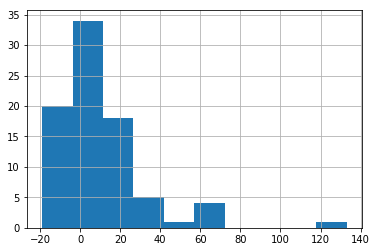

In [24]:
murder['change'].hist()
plt.show()

In [33]:
murder['rate'] = np.where(murder['change'] > 50, 'Get Out',
                           np.where(murder['change'] >= 1, 'Watch Out',
                           np.where(murder['change'] == 0, 'none', 'Stay')))
murder.head(10)

,city,state,2014_murders,2015_murders,change,rate
0,Baltimore,Maryland,211,344,133,Get Out
1,Chicago,Illinois,411,478,67,Get Out
2,Houston,Texas,242,303,61,Get Out
3,Cleveland,Ohio,63,120,57,Get Out
4,Washington,D.C.,105,162,57,Get Out
5,Milwaukee,Wisconsin,90,145,55,Get Out
6,Philadelphia,Pennsylvania,248,280,32,Watch Out
7,Kansas City,Missouri,78,109,31,Watch Out
8,Nashville,Tennessee,41,72,31,Watch Out
9,St. Louis,Missouri,159,188,29,Watch Out


In [31]:
murder.rate.value_counts()

Stay         64
Watch Out     9
Get Out       6
none          4
Name: rate, dtype: int64

In [35]:
murder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 6 columns):
city            83 non-null object
state           83 non-null object
2014_murders    83 non-null int64
2015_murders    83 non-null int64
change          83 non-null int64
rate            83 non-null object
dtypes: int64(3), object(3)
memory usage: 4.0+ KB


In [36]:
murder.isna().sum()

city            0
state           0
2014_murders    0
2015_murders    0
change          0
rate            0
dtype: int64

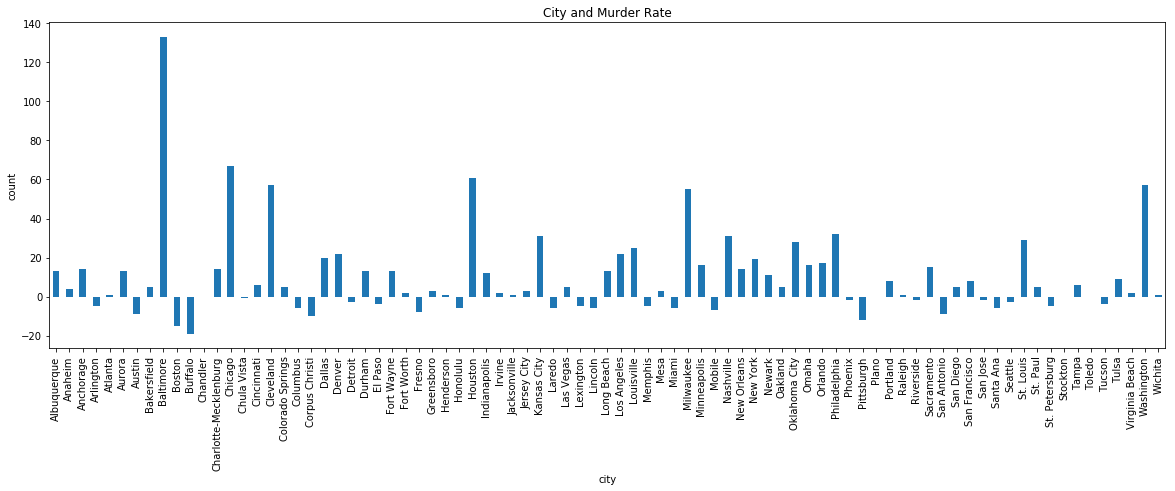

In [50]:
murder.groupby('city').change.mean().plot(kind='bar', figsize=(20,6))
plt.title('City and Murder Rate')
plt.ylabel('count')
plt.show()

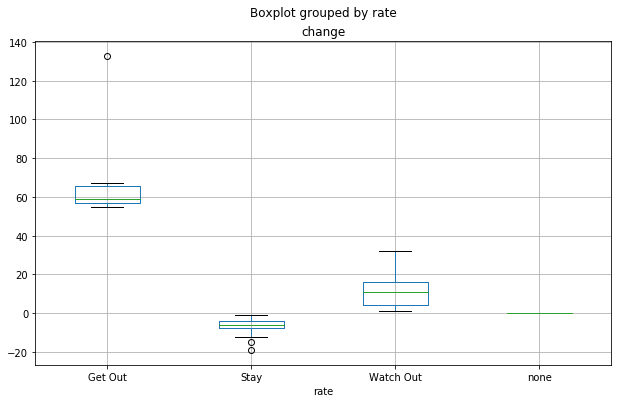

In [52]:
murder.boxplot(column='change', by='rate', figsize=(10,6))
plt.show()

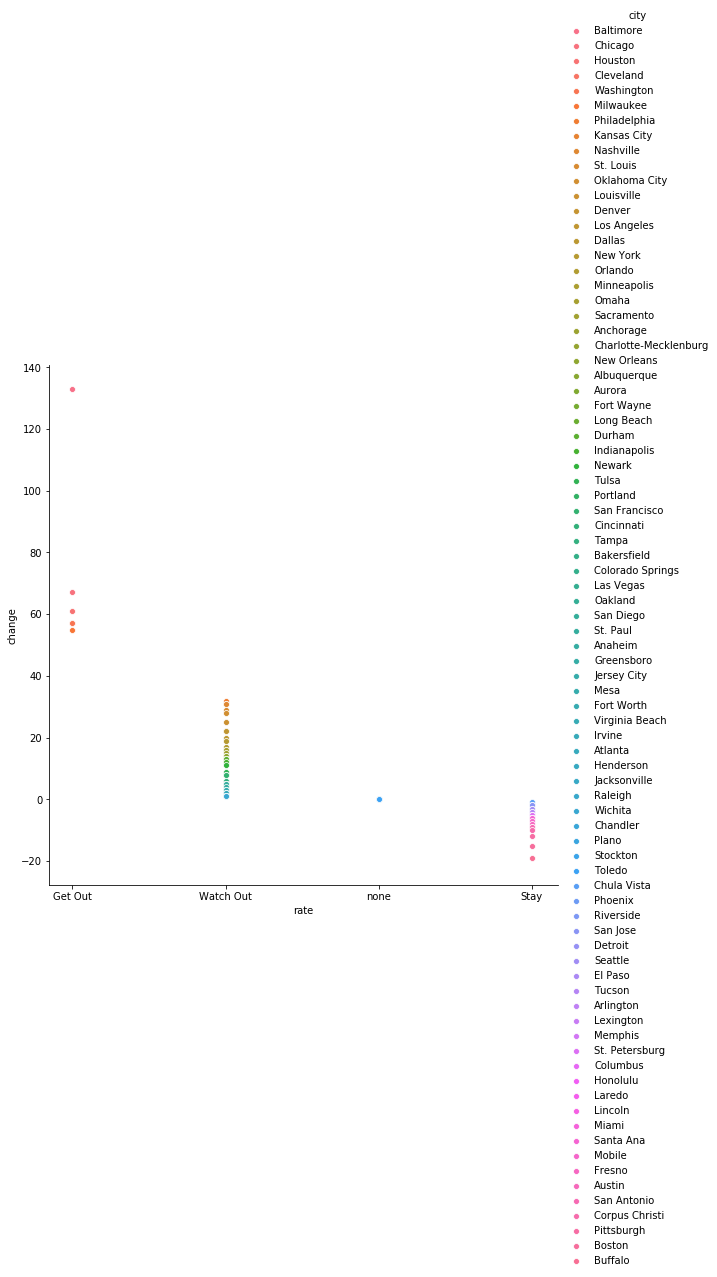

In [54]:
sns.pairplot(x_vars=["rate"], y_vars=["change"], data=murder, hue="city", height=8)
plt.show()

## Assignment - now it's your turn

Pick at least one Python DS library, and using documentation/examples reproduce in this notebook something cool. It's OK if you don't fully understand it or get it 100% working, but do put in effort and look things up.

In [0]:
# TODO - your code here
# Use what we did live in lecture as an example

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  Describe in a paragraph of text what you did and why, as if you were writing an email to somebody interested but nontechnical.

2.  What was the most challenging part of what you did?

3.  What was the most interesting thing you learned?

4.  What area would you like to explore with more time?




1. I analyzed 2014 and 2015 murder counts in 83 cities in the US. I wanted to find out which cities are safe and which cities are dangerous to live in. I collected the data from github and it was a relatively clean data. I realized that the murder rate was high and increasing in cities like baltimore and chicago. On the other hand, cities like Boston and Buffalo are prety safe to live in.

2. The most challenging part was trying to visualize and tell the story of the data.

3. The most interesting thing i learned was that there are a lot more safe cities to live in

4. Creating beautiful visualizations and story telling with data

## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub (and since this is the first assignment of the sprint, open a PR as well).

- [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/)
- [scikit-learn documentation](http://scikit-learn.org/stable/documentation.html)
- [matplotlib documentation](https://matplotlib.org/contents.html)
- [Awesome Data Science](https://github.com/bulutyazilim/awesome-datascience) - a list of many types of DS resources

Stretch goals:

- Find and read blogs, walkthroughs, and other examples of people working through cool things with data science - and share with your classmates!
- Write a blog post (Medium is a popular place to publish) introducing yourself as somebody learning data science, and talking about what you've learned already and what you're excited to learn more about.